# Libraries

In [377]:
import pandas as pd
import numpy as np
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder,OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.metrics import make_scorer, accuracy_score, f1_score, precision_score, recall_score
from sklearn.model_selection import StratifiedKFold
from sklearn.feature_selection import VarianceThreshold

# Loading the DataSet

https://www.kaggle.com/hb20007/gender-classification

In [378]:
gender = pd.read_csv("Transformed Data Set - Sheet1.csv")
balanced_dataset= gender.copy()
balanced_dataset.head()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink,Gender
0,Cool,Rock,Vodka,7UP/Sprite,F
1,Neutral,Hip hop,Vodka,Coca Cola/Pepsi,F
2,Warm,Rock,Wine,Coca Cola/Pepsi,F
3,Warm,Folk/Traditional,Whiskey,Fanta,F
4,Cool,Rock,Vodka,Coca Cola/Pepsi,F


# Inspecting the Data

In [379]:
M=(balanced_dataset['Gender'].value_counts()['M'])/(len(balanced_dataset))*100
print('percentage of gender Male: ',M)
F=balanced_dataset['Gender'].value_counts()['F']/(len(balanced_dataset))*100
print('percentage of gender Femal: ',F)

percentage of gender Male:  50.0
percentage of gender Femal:  50.0


Initially the dataset is balanced. i.e. The target has equal percentage of both classes,Make and Female.

<AxesSubplot:xlabel='Gender', ylabel='count'>

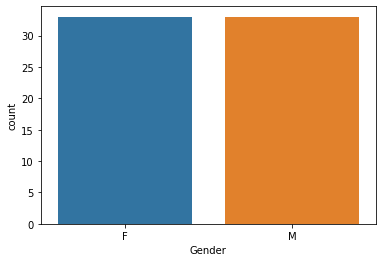

In [380]:
sns.countplot(x="Gender", data=balanced_dataset)

In [381]:
balanced_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 66 entries, 0 to 65
Data columns (total 5 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Favorite Color        66 non-null     object
 1   Favorite Music Genre  66 non-null     object
 2   Favorite Beverage     66 non-null     object
 3   Favorite Soft Drink   66 non-null     object
 4   Gender                66 non-null     object
dtypes: object(5)
memory usage: 2.7+ KB


There are no numerical features,all the columns contains categorical values.

In [382]:
balanced_dataset.shape

(66, 5)

DataSet has 5 columns and 66 rows.



In [383]:
print('Null Values in the dataset: ',balanced_dataset.isnull().sum().sum())

Null Values in the dataset:  0


No column contains the null values.

In [384]:
print('Duplicates in the dataset: ', balanced_dataset.duplicated().sum())

Duplicates in the dataset:  4


There are 4 duplicate rows in the dataset so we have to drop them in the pre-processing step.

# Visualizing the Data

Displaying the distribution of features among both classes in terms of percentage.
https://medium.com/swlh/how-to-create-percentage-plots-for-visualizing-your-data-in-python-f0d894d7c7bb

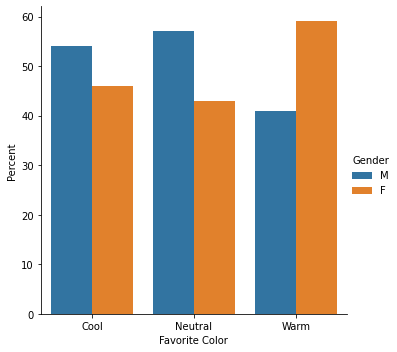

In [385]:
df_temp = balanced_dataset.groupby('Favorite Color')['Gender'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='Favorite Color', y='Percent', hue='Gender', kind='bar', data=df_temp)

Insight from above graph: Percentage of males who like cool and neutral colors is more than females while females prefer warm colors.

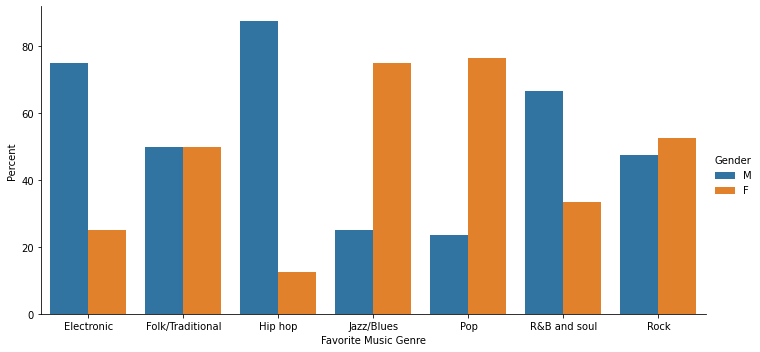

In [386]:
df_temp = balanced_dataset.groupby('Favorite Music Genre')['Gender'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='Favorite Music Genre', y='Percent', hue='Gender', kind='bar', data=df_temp, aspect=2)

Insight: Percentage of male and female liking the music genre folk/traditional is equal. In case of genre rock its also  almost equal, while in case of other genres, percentage differs significantly.

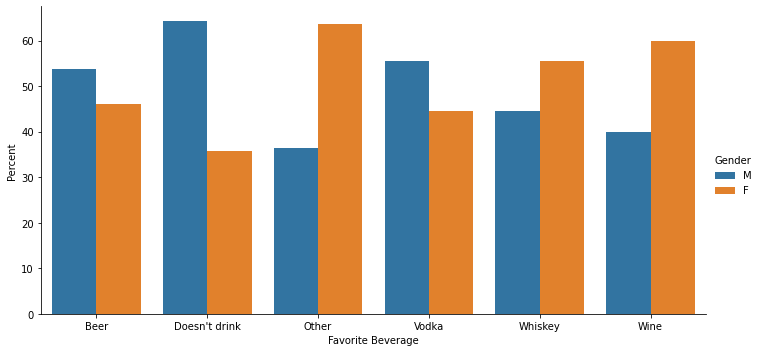

In [387]:
df_temp = balanced_dataset.groupby('Favorite Beverage')['Gender'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='Favorite Beverage', y='Percent', hue='Gender', kind='bar', data=df_temp, aspect=2)

Insight: Percentage of Males who prefer to drink beer and vodka is more than females while females prefer wine, whiskey and other beverages.
Also, percentage of females who drink is more than males.

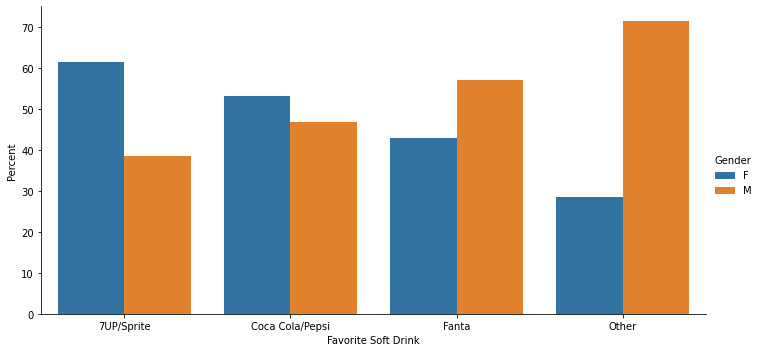

In [388]:
df_temp = balanced_dataset.groupby('Favorite Soft Drink')['Gender'].value_counts(normalize=True)
df_temp = df_temp.mul(100).rename('Percent').reset_index()
sns.catplot(x='Favorite Soft Drink', y='Percent', hue='Gender', kind='bar', data=df_temp, aspect=2)

Insight: 7up/Sprite and Coca Cola/Pepsi are more popluar drinks in females while males prefer fanta and other soft drinks.

# Data pre-processing

In [389]:
print("Number of rows before dropping duplicates: %d" % len(balanced_dataset))
balanced_dataset= balanced_dataset.drop_duplicates()
print("Number of rows after dropping duplicates: %d" % len(balanced_dataset))

Number of rows before dropping duplicates: 66
Number of rows after dropping duplicates: 62


As visualized earlier, they were 4 duplicate rows in the dataset so we have removed them but we need to check if the dataset is still balanced after removing duplicate rows.

In [390]:
M=(balanced_dataset['Gender'].value_counts()['M'])/(len(balanced_dataset))*100
print('percentage of gender Male: ',M)
F=balanced_dataset['Gender'].value_counts()['F']/(len(balanced_dataset))*100
print('percentage of gender Femal: ',F)

percentage of gender Male:  50.0
percentage of gender Femal:  50.0


Balance was not disturbed after dropping the duplicate rows.

In [391]:
balanced_dataset[features].describe()

,Favorite Color,Favorite Music Genre,Favorite Beverage,Favorite Soft Drink
count,62,62,62,62
unique,3,7,6,4
top,Cool,Pop,Doesn't drink,Coca Cola/Pepsi
freq,33,17,14,28


Above table shows the number of unique values in a feature as well as the most frequent value and its frequency.

In [392]:
features=['Favorite Color','Favorite Music Genre','Favorite Beverage','Favorite Soft Drink']
unique_values=0
for i in range(len(features)):
    unique_values=unique_values+len(balanced_dataset[features[i]].unique())
print('Total Unique Values among all features: ',unique_values)

Total Unique Values among all features:  20


On observing the features, it can be seen that the features contains nominal values. i.e. they cannot be ranked so we cannot perform ordinal encoding.Therefore, we are going to perform the one hot encoding.

In [393]:
X_balanced_dataset = pd.get_dummies(balanced_dataset[features]) # get dummies
X_balanced_dataset.head()

,Favorite Color_Cool,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Electronic,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,Favorite Beverage_Beer,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_7UP/Sprite,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other
0,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0
1,0,1,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,1,0,0
2,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,1,0,0
3,0,0,1,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0
4,1,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,1,0,0


We will be performing label encoding on the target column to convert the values to numerical form.

In [394]:
Y_balanced_dataset=balanced_dataset['Gender'].copy()
encoder=LabelEncoder()
Y_balanced_dataset=encoder.fit_transform(Y_balanced_dataset)
Y_balanced_dataset
#Male=1, Female=0

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1])

We are going to drop one column from each feature beacause while creating dummy variables atleast two columns are corelated. I.e. One variable can predict the values of other variables. This problem is known as dummy variable trap.

In [395]:
X_balanced_dataset.drop(columns=['Favorite Color_Cool','Favorite Music Genre_Electronic','Favorite Beverage_Beer','Favorite Soft Drink_7UP/Sprite'],inplace=True)
X_balanced_dataset.head()

,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other
0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,0,0
1,1,0,0,1,0,0,0,0,0,0,1,0,0,1,0,0
2,0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0
3,0,1,1,0,0,0,0,0,0,0,0,1,0,0,1,0
4,0,0,0,0,0,0,0,1,0,0,1,0,0,1,0,0


Now we need to make a copy by concatenating features and labels both into a single dataframe, so that we can use it while creating the surrogates.

In [396]:
balanced_dataset=X_balanced_dataset.copy()
balanced_dataset['Gender']=Y_balanced_dataset.tolist()

# Creating a Surrogate achieving low Imbalance

In [397]:
F=balanced_dataset[balanced_dataset['Gender'] == 0] 
F= F.sample(replace=False,  n=16, random_state=1) #minority class female represented by 0
M=balanced_dataset[balanced_dataset['Gender'] == 1] 
M= M.sample(replace=False,  n=30, random_state=1) #majority class male represented by 1
Imbalanced_dataset_low=pd.concat([M, F])
Imbalanced_dataset_low.head()

,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other,Gender
60,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
36,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
52,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1
56,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
55,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [398]:
M=(Imbalanced_dataset_low['Gender'].value_counts()[1])/(len(Imbalanced_dataset_low))*100
print('percentage of class Male: ',round(M))
F=Imbalanced_dataset_low['Gender'].value_counts()[0]/(len(Imbalanced_dataset_low))*100
print('percentage of class Female: ',round(F))

percentage of class Male:  65
percentage of class Female:  35


<AxesSubplot:xlabel='Gender', ylabel='count'>

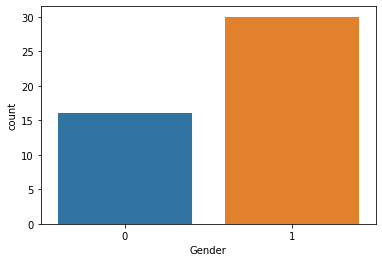

In [399]:
sns.countplot(x="Gender", data=Imbalanced_dataset_low)

In [400]:
Imbalanced_dataset_low.shape

(46, 17)

Low Surrogate dataset has 46 rows and same number of columns as in balanced dataset.

In [401]:
print('Duplicates in the dataset: ', Imbalanced_dataset_low.duplicated().sum())

Duplicates in the dataset:  0


Duplicates are checked to ensure that there was no duplication while randomly sub-sampling from the e class.

In [402]:
X_Imbalanced_dataset_low=Imbalanced_dataset_low.drop(columns=['Gender'])
Y_Imbalanced_dataset_low=Imbalanced_dataset_low['Gender'].copy()

Features and target label are separated in the above piece of code.

# Creating a Surrogate achieving Medium Imbalance

In [403]:
F=balanced_dataset[balanced_dataset['Gender'] == 0] 
F= F.sample(replace=False,  n=10, random_state=1) #minority class female represented by 0
M=balanced_dataset[balanced_dataset['Gender'] == 1] 
M= M.sample(replace=False,  n=30, random_state=1) #majority class male represented by 1
Imbalanced_dataset_med=pd.concat([M, F])
Imbalanced_dataset_med.head()

,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other,Gender
60,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
36,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
52,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1
56,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
55,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [404]:
M=(Imbalanced_dataset_med['Gender'].value_counts()[1])/(len(Imbalanced_dataset_med))*100
print('percentage of class Male: ',M)
F=Imbalanced_dataset_med['Gender'].value_counts()[0]/(len(Imbalanced_dataset_med))*100
print('percentage of class Female: ',F)

percentage of class Male:  75.0
percentage of class Female:  25.0


<AxesSubplot:xlabel='Gender', ylabel='count'>

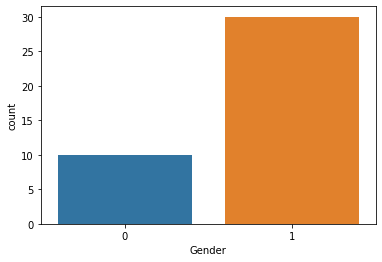

In [405]:
sns.countplot(x="Gender", data=Imbalanced_dataset_med)

In [406]:
Imbalanced_dataset_med.shape

(40, 17)

Med Surrogate dataset has 40 rows and same number of columns as in balanced dataset.

In [407]:
print('Duplicates in the dataset: ', Imbalanced_dataset_med.duplicated().sum())

Duplicates in the dataset:  0


Duplicates are checked to ensure that there was no duplication while randomly sub-sampling from the e class.

In [408]:
X_Imbalanced_dataset_med=Imbalanced_dataset_med.drop(columns=['Gender'])
Y_Imbalanced_dataset_med=Imbalanced_dataset_med['Gender'].copy()

Features and target label are separated in the above piece of code.

# Creating a Surrogate achieving High Imbalance

In [409]:
F=balanced_dataset[balanced_dataset['Gender'] == 0] 
F= F.sample(replace=False,  n=3, random_state=1) #minority class female represented by 0
M=balanced_dataset[balanced_dataset['Gender'] == 1] 
M= M.sample(replace=False,  n=27, random_state=1) #majority class male represented by 1
Imbalanced_dataset_high=pd.concat([M, F])
Imbalanced_dataset_high.head()

,Favorite Color_Neutral,Favorite Color_Warm,Favorite Music Genre_Folk/Traditional,Favorite Music Genre_Hip hop,Favorite Music Genre_Jazz/Blues,Favorite Music Genre_Pop,Favorite Music Genre_R&B and soul,Favorite Music Genre_Rock,Favorite Beverage_Doesn't drink,Favorite Beverage_Other,Favorite Beverage_Vodka,Favorite Beverage_Whiskey,Favorite Beverage_Wine,Favorite Soft Drink_Coca Cola/Pepsi,Favorite Soft Drink_Fanta,Favorite Soft Drink_Other,Gender
60,0,0,0,0,0,0,0,0,0,0,0,1,0,1,0,0,1
36,1,0,0,0,0,0,0,1,1,0,0,0,0,1,0,0,1
52,0,0,0,1,0,0,0,0,1,0,0,0,0,0,0,1,1
56,0,1,1,0,0,0,0,0,0,1,0,0,0,0,1,0,1
55,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0,1


In [410]:
M=(Imbalanced_dataset_high['Gender'].value_counts()[1])/(len(Imbalanced_dataset_high))*100
print('percentage of class Male: ',M)
F=Imbalanced_dataset_high['Gender'].value_counts()[0]/(len(Imbalanced_dataset_high))*100
print('percentage of class Female: ',F)

percentage of class Male:  90.0
percentage of class Female:  10.0


<AxesSubplot:xlabel='Gender', ylabel='count'>

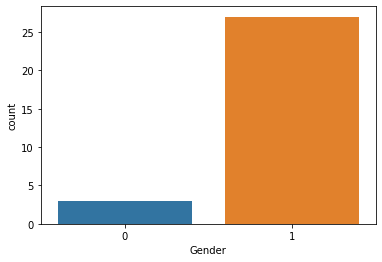

In [411]:
sns.countplot(x="Gender", data=Imbalanced_dataset_high)

In [412]:
Imbalanced_dataset_high.shape

(30, 17)

High Surrogate dataset has 30 rows and same number of columns as in balanced dataset.

In [413]:
print('Duplicates in the dataset: ', Imbalanced_dataset_high.duplicated().sum())

Duplicates in the dataset:  0


Duplicates are checked to ensure that there was no duplication while randomly sub-sampling from the e class.

In [414]:
X_Imbalanced_dataset_high=Imbalanced_dataset_high.drop(columns=['Gender'])
Y_Imbalanced_dataset_high=Imbalanced_dataset_high['Gender'].copy()

Features and target label are separated in the above piece of code.